# Plumed Analysis Notebook

Using this notebook to visualize and analyze the output from the H-bond metadynamics simulations

In [1]:
import plumed
import signac
import signac_project
import matplotlib.pyplot as plt
import subprocess
import pandas as pd
import os

plt.rcParams.update({'font.size':9})
kt = 300 * 8.314462618 * 10 ** -3

/home/tfobe/anaconda3/envs/plumed/lib/python3.11/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Get Signac setup

In [2]:
project = signac.get_project()
df = project.to_dataframe()

In [5]:
status = []
for job in project.find_jobs():
    id = job.get_id()
    status.append(signac_project.check_production_npt_finish(job))
df["Completed"] = status
pd.set_option('display.max_rows', None)
df.sort_values(["Completed", "sp.bf"], ascending=[False, True])

/tmp/ipykernel_17599/2111980519.py:3: DeprecatedWarning: get_id is deprecated as of 1.3 and will be removed in 2.0. Use job.id instead.
  id = job.get_id()


,sp.height,sp.sigma,sp.bf,sp.temperature,Completed
493850f76760fa9e8f983789acad44db,1.5,0.5,50,300.0,True
e63764bbbeebdd03f2cd49b28cf2b47a,2.5,0.5,50,300.0,True
99d4e6783b9dac429a62d352b78a443f,2.0,0.5,50,300.0,True
869e0a6a25c4d0fdab48f098480ddc8b,2.5,0.3,50,300.0,True
3d955673f84fcb564fb5083580cd1369,0.5,0.1,50,300.0,True
b7636f06955fd4e3bc3634916d3cfa5e,0.5,0.5,50,300.0,True
9e48873f282ab5154ad53620b554fc76,1.0,0.5,50,300.0,True
e804389034122b0da8b6623ad6b22ef9,1.5,0.5,100,300.0,True
8b3b5ab0b4e2e4f70b859642659522c6,0.5,0.5,100,300.0,True
b2464f2621c78668b9d4cb656cbf16fc,0.5,0.3,100,300.0,True


In [4]:
!python signac_project.py status

Using environment configuration: StandardEnvironment
Fetching labels: 100%|██████████████████████████| 75/75 [00:22<00:00,  3.32it/s]

Overview: 75 jobs/aggregates, 75 jobs/aggregates with eligible operations.

label                        ratio
---------------------------  ----------------------------------------------------------
check_berendsen_nvt_start    |████████████████████████████████████████| 75/75 (100.00%)
check_submitted              |████████████████████████████████████████| 75/75 (100.00%)
check_berendsen_npt_start    |███████████████████████████████████████▍| 74/75 (98.67%)
check_berendsen_nvt_finish   |███████████████████████████████████████▍| 74/75 (98.67%)
check_berendsen_npt_finish   |██████████████████████████████████████▉ | 73/75 (97.33%)
check_production_npt_start   |██████████████████████████████████████▉ | 73/75 (97.33%)
has_backup_files             |██████████████████████████████████████▉ | 73/75 (97.33%)
has_failed_step_files        |█████████████████████████

## Check CV of finished simulations

Using signac we can access simulations that have finished running

In [7]:
# Funciton to plot H-bonds for individual directories
hide_plots = False

def plot_CV_bias(job, filename = "CV_bias_plot.png", dpi=300):
    plt.figure(dpi=dpi)
    data = plumed.read_as_pandas(job.fn("HBOND_SUMS"))
    data_2 = plumed.read_as_pandas(job.fn("HILLS"))
    fig, ax = plt.subplots(6,1, figsize = [15,10])
    ax[0].set_title("SIGMA: " +  str(job.sp.sigma) +  " HEIGHT:" + str(job.sp.height) + " BF:" + str(job.sp.bf))
    ax[0].plot(data.time/1000, data.values[:,1])
    ax[0].set_ylabel("Hydrogen Bond 1")
    ax[1].plot(data.time/1000, data.values[:,2])
    ax[1].set_ylabel("Hydrogen Bond 2")
    ax[2].plot(data.time/1000, data.values[:,3])
    ax[2].set_ylabel("Hydrogen Bond 3")
    ax[3].plot(data.time/1000, data.values[:,4])
    ax[3].set_ylabel("Sum of H-Bonds")
    ax[4].plot(data.time/1000, data.values[:,5],'r')
    ax[4].set_ylabel("Bias Energy")
    ax[4].set_xlabel("Time (ns)")
    ax[5].plot(data_2.time/1000, data_2.values[:,3],'b')
    ax[5].set_ylabel("Gaussian Height")
    ax[5].set_xlabel("Time (ns)")
    plt.savefig(job.fn(filename))
    if hide_plots:
        plt.close()


In [ ]:
%matplotlib inline
for job in project.find_jobs():
    if signac_project.check_production_npt_finish(job):
        plot_CV_bias(job)  

## Run preliminary free energy calculation

First we can calculate a preliminary FES using the `plumed sum_hills` function.

In [8]:
os.path.abspath("")

'/mnt/bridges2/heteropolymer_simulations/simulations/terphenyl_mop/tetramer_metad/h_bonds/biased/extended/single_walker'

In [9]:
current_dir = os.path.abspath("")

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/tfobe/anaconda3/envs/plumed/lib/libplumedKernel.so" +++
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/tfobe/anaconda3/envs/plumed/lib/libplumedKernel.so" +++


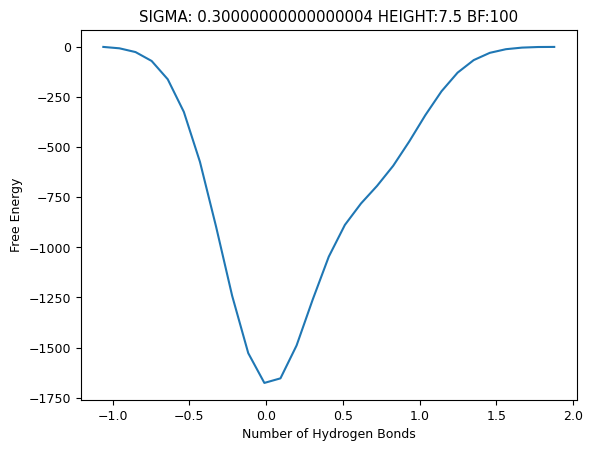

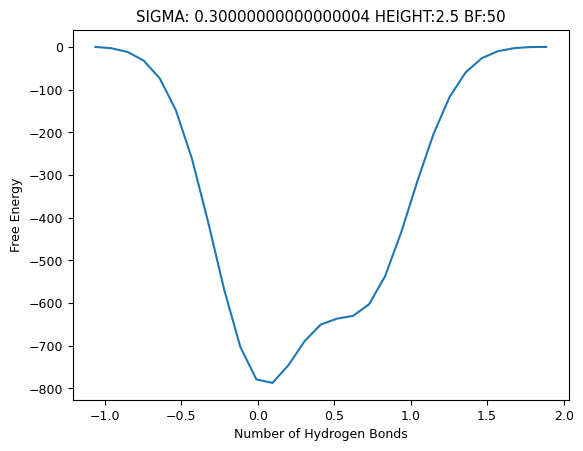

In [10]:
%matplotlib inline
for job in project.find_jobs():
    if signac_project.check_production_npt_finish(job):
        os.chdir(job.fn(""))
        subprocess.run(["plumed", "sum_hills", "--hills", "HILLS", "--kt", str(kt)], stdout=subprocess.DEVNULL) # Silences output from sum_hills
        fes_data = plumed.read_as_pandas("fes.dat")
        plt.figure()
        plt.plot(fes_data.values[:,0], fes_data.values[:,1])
        plt.title("SIGMA: " +  str(job.sp.sigma) +  " HEIGHT:" + str(job.sp.height) + " BF:" + str(job.sp.bf))
        plt.xlabel("Number of Hydrogen Bonds")
        plt.ylabel("Free Energy")
        os.chdir(current_dir)

In [ ]:
def calculate_statistical_inefficiency():
    pass

In [11]:
for job in project.find_jobs():
    if signac_project.check_production_npt_finish(job):
        # Calculate

SyntaxError: incomplete input (1637479708.py, line 3)